In [1]:
import spectral.io.envi as envi
import numpy as np
import matplotlib.pyplot as plt
from spectral import *
from utils import read_rgb

In [2]:
input_image = envi.open('data/hebing.hdr', 'data/hebing.raw')

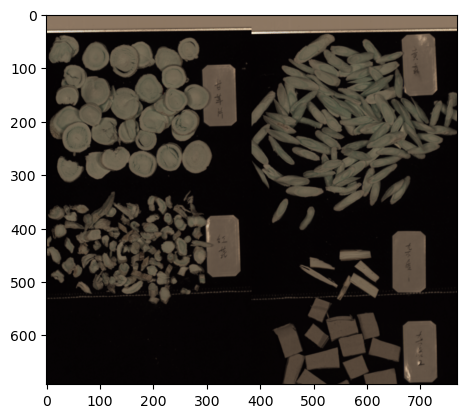

In [3]:
view = imshow(input_image, (29, 19, 9))

In [4]:
output_image = read_rgb('data/hebing.png')

In [5]:
# 统计每类样本所含个数
dict_k = {}
for i in range(output_image.shape[0]):
    for j in range(output_image.shape[1]):
        #if output_image[i][j] in [m for m in range(1,17)]:
        if output_image[i][j] in [1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13]:
            if output_image[i][j] not in dict_k:
                dict_k[output_image[i][j]]=0
            dict_k[output_image[i][j]] +=1


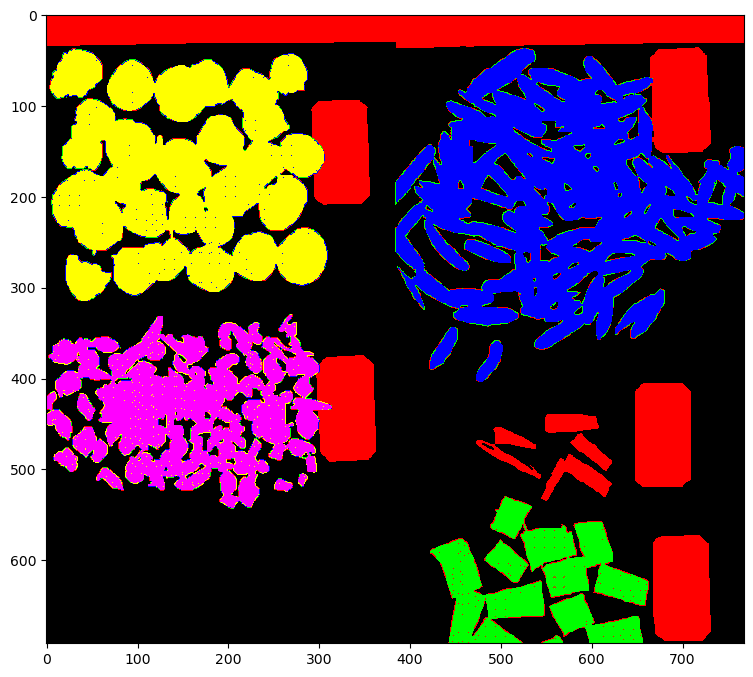

In [6]:
# 展示地物
ground_truth = imshow(classes = output_image.astype(int),figsize =(9,9))

In [7]:

input_image = input_image.load()


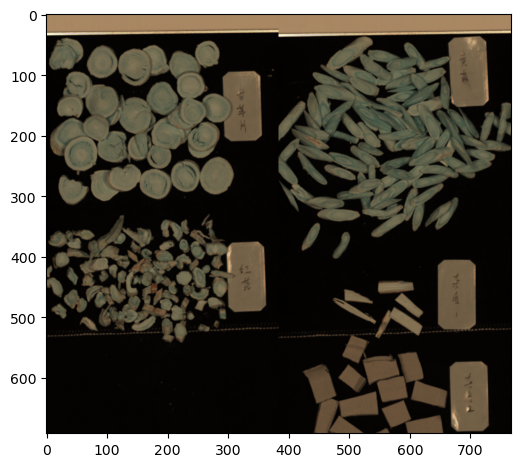

spectral:INFO: k-means iteration 1 - 210080 pixels reassigned.
spectral:INFO: k-means iteration 2 - 17105 pixels reassigned.
spectral:INFO: k-means iteration 3 - 3337 pixels reassigned.
spectral:INFO: k-means iteration 4 - 740 pixels reassigned.
spectral:INFO: k-means iteration 5 - 256 pixels reassigned.
spectral:INFO: k-means iteration 6 - 175 pixels reassigned.
spectral:INFO: k-means iteration 7 - 157 pixels reassigned.
spectral:INFO: k-means iteration 8 - 154 pixels reassigned.
spectral:INFO: k-means iteration 9 - 132 pixels reassigned.
spectral:INFO: k-means iteration 10 - 106 pixels reassigned.
spectral:INFO: k-means iteration 11 - 85 pixels reassigned.
spectral:INFO: k-means iteration 12 - 82 pixels reassigned.
spectral:INFO: k-means iteration 13 - 66 pixels reassigned.
spectral:INFO: k-means iteration 14 - 67 pixels reassigned.
spectral:INFO: k-means iteration 15 - 51 pixels reassigned.
spectral:INFO: k-means iteration 16 - 37 pixels reassigned.
spectral:INFO: k-means iteration 

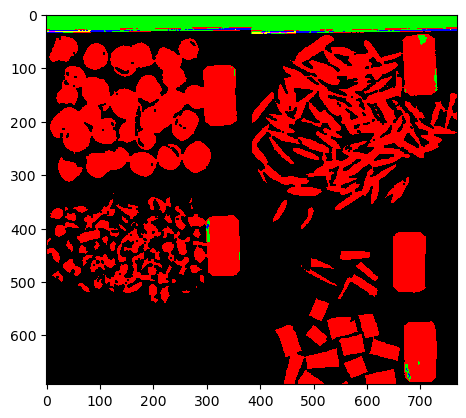

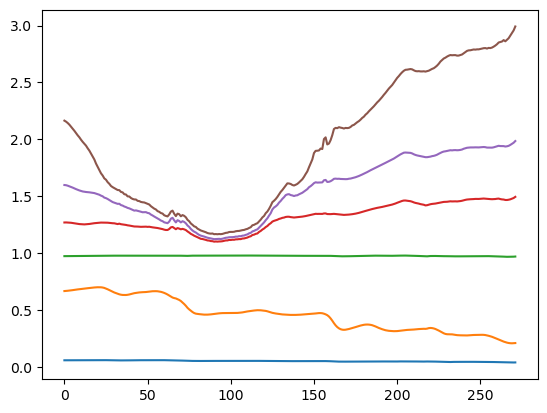

spectral:INFO: Setting min samples to 272


Processing...done   
类别1的用户精度为：0.9937,生产者精度为：0.9756
类别2的用户精度为：0.9822,生产者精度为：0.9509
类别3的用户精度为：0.8552,生产者精度为：0.9225
类别4的用户精度为：0.8758,生产者精度为：0.9057
类别5的用户精度为：0.6865,生产者精度为：0.5829
------------------------------------
Kappa= 0.8509910682244329
overall_accuracy 0.8855253608579953


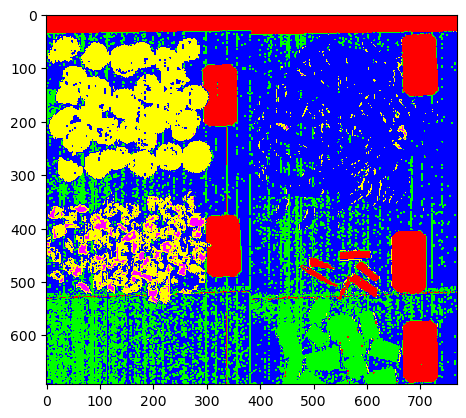

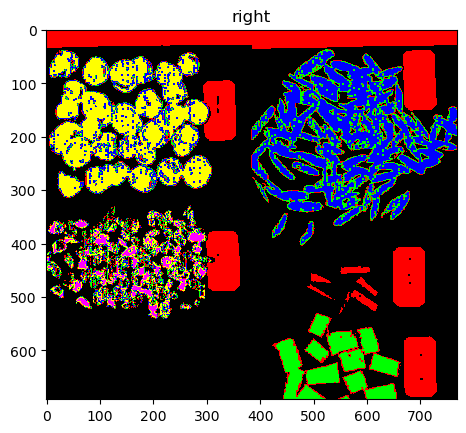

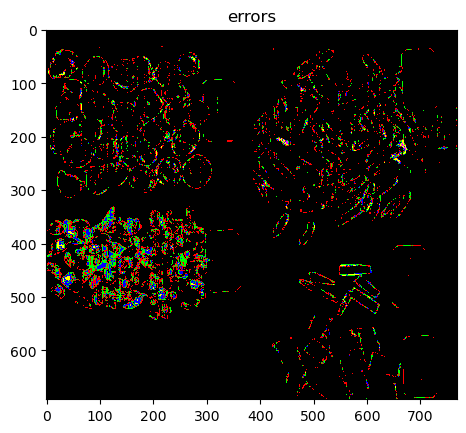

In [8]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
import spectral as spy
import numpy as np


def unsupervised_demo(src):  # K-means法 迭代方法生成聚类
    m, c = spy.kmeans(src, nclusters=6, max_iterations=30)  # 分为6类，最大迭代30次
    spy.imshow(classes=m)  # 显示分类结果
    plt.figure()
    for i in range(c.shape[0]):  # 显示分类后的各光谱曲线
        plt.plot(c[i])
    plt.pause(60)


def supervised_demo(src,gt):
    classes = spy.create_training_classes(src, gt)  # 创建训练类集合
    gmlc = spy.GaussianClassifier(classes)  # 高斯的最大似然分类法
    clmap = gmlc.classify_image(src)
    spy.imshow(classes=clmap)
    gt_results = clmap * (gt != 0)  # 为分好类的图像设定一个Mask
    gt_right = gt_results * (gt_results == gt)
    gt_errors = gt_results * (gt_results != gt)
    spy.imshow(classes=gt_right, title="right")  # 分类正确的部分
    spy.imshow(classes=gt_errors, title="errors")  # 分类错误的部分
    precision_evaluation(gt_results ,gt)  # 精度评定
    plt.pause(60)


def precision_evaluation(cla, gt):  # 精度评定
    def count_number(src):  # 统计分类数据
        dict_k = {}
        for row in range(src.shape[0]):
            for col in range(src.shape[1]):
                if src[row][col] not in dict_k:
                    dict_k[src[row][col]] = 0
                dict_k[src[row][col]] += 1
        dict_k = dict(sorted(dict_k.items()))
        del dict_k[0]  # 键为0的是未归类的部分,所以去掉
        class_sum = sum(dict_k.values())
        return dict_k, class_sum

    cla_dic, cla_sum = count_number(cla)  # 分类后的
    gt_dic, gt_sum = count_number(gt)  # 真实的
    gt_right = cla * (cla == gt)
    gt_right_dic, gt_right_sum = count_number(gt_right)  # 分类正确的

    p0 = gt_right_sum / gt_sum
    pe = 0

    for gt_key in gt_dic:
        if gt_key not in cla_dic:
            cla_dic[gt_key] = 0
            gt_right_dic[gt_key] = 0
            print("类别%s的用户精度为：0.0000,生产者精度为：0.0000" % gt_key)
        else:
            print("类别%s的用户精度为：%.4f," % (gt_key, gt_right_dic[gt_key] / cla_dic[gt_key]), end='')
            print("生产者精度为：%.4f" % (gt_right_dic[gt_key] / gt_dic[gt_key]))
        pe += gt_dic[gt_key] * cla_dic[gt_key]

    pe = pe / (gt_sum * gt_sum)
    kappa = (p0 - pe) / (1 - pe)
    overall_accuracy = gt_right_sum / gt_sum
    print("-" * 36)
    print("Kappa=", kappa)
    print("overall_accuracy", overall_accuracy)



gt = read_rgb('data/hebing.png')
# 可视化影像
view = spy.imshow(data=input_image, bands=[69, 27, 11], figsize=(6, 6))
plt.pause(60)
# 分类
unsupervised_demo(input_image)
supervised_demo(input_image,gt)
